# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [86]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [41]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

1.  The target variable is "fraud", and it is a categorical distribution. We can say that we are dealing with an imbalanced dataset

In [42]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [43]:
fraud.shape

(1000000, 8)

Preparing the data before modeling

In [44]:
fraud["fraud"].value_counts()
# fraud.plot(kind="bar")
# plt.show()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [69]:
# Distribution of the target variable "Fraud"
fraud_distribution = fraud["fraud"].value_counts(normalize=True)
print("Fraud Distribution:", fraud_distribution)

Fraud Distribution: fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


For baseline, we will train a Logistic Regression in imbalanced data. 

In [55]:
features = fraud.drop(columns=["fraud"])
target = fraud["fraud"]

x_train, x_test, y_train, y_test = train_test_split(features, target)

In [56]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [57]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

2. Train a Logistic Regression

In [58]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [60]:
log_reg.score(x_test_scaled, y_test)

0.958932

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [67]:
pred = log_reg.predict(x_test_scaled)
classification_rep = classification_report(y_pred=pred, y_true=y_test)
conf_matrix = confusion_matrix(y_test, pred)

In [68]:
# Print the results 
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228102
         1.0       0.90      0.60      0.72     21898

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

Confusion Matrix:
[[226559   1543]
 [  8724  13174]]


 **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [70]:
train = pd.DataFrame(x_train_scaled, columns = x_train.columns)

In [71]:
train["fraud"] = y_train.values

In [72]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [73]:
yes_oversampled = resample(fraud, 
                           replace=True, 
                           n_samples= len(no_fraud), 
                           random_state=0)

In [74]:
train_over = pd.concat([yes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31135,0.972028,0.048010,0.941515,0.366593,-0.734352,-0.334416,0.733270,1.0
498507,0.448632,3.126377,2.293532,0.366593,1.361745,-0.334416,0.733270,1.0
487784,-0.314333,-0.191560,1.123551,0.366593,1.361745,-0.334416,0.733270,1.0
600586,-0.399063,-0.130954,5.619222,-2.727820,1.361745,-0.334416,0.733270,1.0
525867,1.453679,0.002625,-0.301968,0.366593,-0.734352,-0.334416,0.733270,1.0
...,...,...,...,...,...,...,...,...
749993,0.039354,0.017764,0.084109,0.366593,-0.734352,-0.334416,-1.363753,0.0
749994,-0.326558,0.425287,-0.444592,0.366593,-0.734352,-0.334416,0.733270,0.0
749995,-0.384730,-0.172805,-0.252723,-2.727820,-0.734352,-0.334416,0.733270,0.0
749997,-0.311114,-0.191352,-0.475684,0.366593,-0.734352,-0.334416,0.733270,0.0


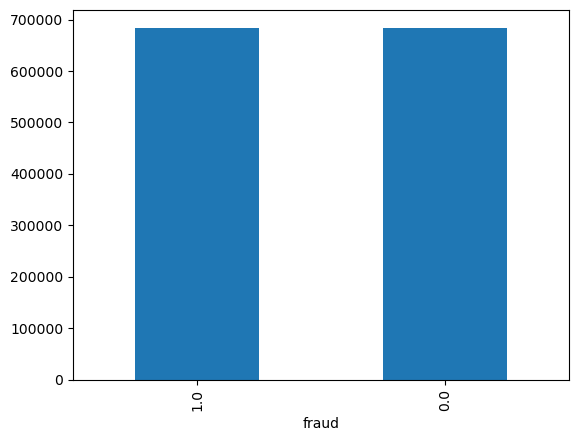

In [75]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

Now with balanced data, we will create a new instance of Logistic Regression

In [76]:
x_train_over = train_over.drop(columns= ["fraud"])
y_train_over = train_over["fraud"]

In [77]:
log_reg = LogisticRegression()
log_reg.fit(x_train_over, y_train_over)

LogisticRegression()

In [78]:
pred = log_reg.predict(x_test_scaled)
print(classification_report(y_pred= pred, y_true=y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228102
         1.0       0.57      0.95      0.72     21898

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [79]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.456364,1.014815,0.969340,0.366593,-0.734352,-0.334416,0.733270,1.0
1,-0.279423,0.135599,0.006565,0.366593,1.361745,-0.334416,0.733270,0.0
2,1.125624,-0.187170,-0.589903,0.366593,-0.734352,-0.334416,0.733270,1.0
3,1.627466,-0.168699,-0.514187,0.366593,-0.734352,-0.334416,0.733270,1.0
4,-0.333392,-0.082811,-0.589791,0.366593,-0.734352,-0.334416,-1.363753,0.0
...,...,...,...,...,...,...,...,...
749995,-0.384730,-0.172805,-0.252723,-2.727820,-0.734352,-0.334416,0.733270,0.0
749996,0.596509,-0.170773,1.250185,0.366593,1.361745,-0.334416,0.733270,1.0
749997,-0.311114,-0.191352,-0.475684,0.366593,-0.734352,-0.334416,0.733270,0.0
749998,-0.149562,-0.107341,-0.452772,0.366593,-0.734352,-0.334416,0.733270,0.0


**5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [80]:
no_undersampled = resample(no_fraud, 
                           replace=False, 
                           n_samples=len(fraud), 
                           random_state=0)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
739845,0.251180,0.048770,-0.462562,0.366593,-0.734352,-0.334416,-1.363753,0.0
563112,-0.248993,-0.150262,-0.533015,0.366593,-0.734352,-0.334416,0.733270,0.0
31070,-0.248005,-0.141740,0.517274,0.366593,-0.734352,-0.334416,-1.363753,0.0
291162,-0.350541,-0.183805,-0.351580,0.366593,-0.734352,-0.334416,0.733270,0.0
331491,0.812434,-0.159545,-0.461772,0.366593,1.361745,-0.334416,0.733270,0.0
...,...,...,...,...,...,...,...,...
428661,-0.073746,-0.129939,-0.472791,0.366593,1.361745,-0.334416,-1.363753,0.0
547189,-0.359947,-0.149877,-0.220337,0.366593,1.361745,2.990285,0.733270,0.0
3933,-0.345271,-0.190576,-0.561346,0.366593,1.361745,2.990285,0.733270,0.0
15234,-0.375924,-0.176234,-0.202410,0.366593,-0.734352,-0.334416,0.733270,0.0


In [81]:
train_under = pd.concat([no_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
739845,0.251180,0.048770,-0.462562,0.366593,-0.734352,-0.334416,-1.363753,0.0
563112,-0.248993,-0.150262,-0.533015,0.366593,-0.734352,-0.334416,0.733270,0.0
31070,-0.248005,-0.141740,0.517274,0.366593,-0.734352,-0.334416,-1.363753,0.0
291162,-0.350541,-0.183805,-0.351580,0.366593,-0.734352,-0.334416,0.733270,0.0
331491,0.812434,-0.159545,-0.461772,0.366593,1.361745,-0.334416,0.733270,0.0
...,...,...,...,...,...,...,...,...
749978,-0.026920,1.736394,1.284000,0.366593,-0.734352,-0.334416,0.733270,1.0
749980,-0.368365,-0.007212,1.414437,0.366593,-0.734352,-0.334416,0.733270,1.0
749983,-0.376897,0.100605,0.777180,0.366593,1.361745,-0.334416,0.733270,1.0
749996,0.596509,-0.170773,1.250185,0.366593,1.361745,-0.334416,0.733270,1.0


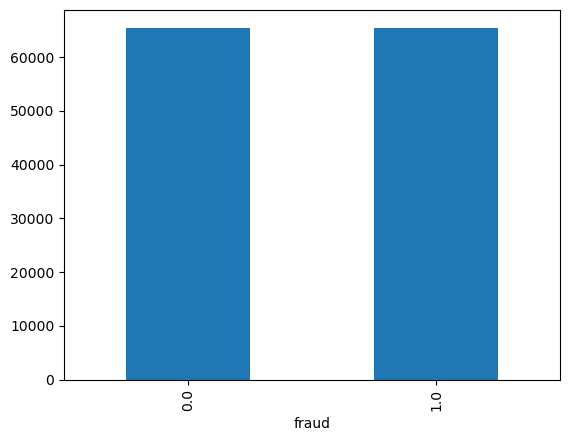

In [82]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [83]:
x_train_under = train_under.drop(columns=["fraud"])
y_train_under = train_under["fraud"]

Training the model 

In [84]:
log_reg = LogisticRegression()
log_reg.fit(x_train_under, y_train_under)

LogisticRegression()

Evaluating the model

In [85]:
pred = log_reg.predict(x_test_scaled)
print(classification_report(y_pred= pred, y_true=y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228102
         1.0       0.58      0.95      0.72     21898

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



**6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [87]:
sm = SMOTE(random_state= 1, sampling_strategy=1.0)

In [88]:
x_train_sm, y_train_sm = sm.fit_resample(x_train_scaled, y_train)

Now we are going to train the model to see if there will be any improvements

In [89]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

Evaluating the model

In [90]:
pred = log_reg.predict(x_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228102
         1.0       0.57      0.95      0.72     21898

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

